## Assignment 1

#### Question 1

1. Use your regression data and a KNN model for regression. Choose K, say 10, run your code to predict, once with normalizing and other time without normalizing input data (Choose standard normalization). Compare the results. Plot the performance plots (such as what you can find in 010-KNN-Regression-DistanceToGalaxies.ipynb, Jan25). Have a discussion about the model performances and the results. 

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing and feature extraction

In [4]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [10]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [9]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### Look at the histograms of the data before normalization

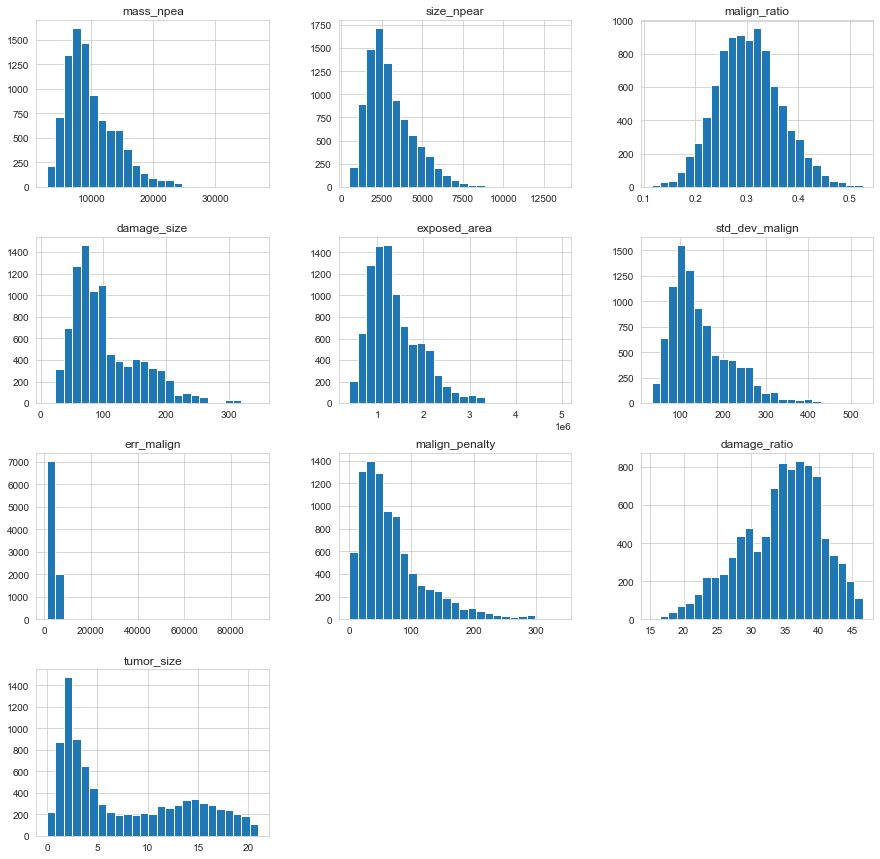

In [11]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

### Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [12]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data[['tumor_size']].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146, 1)


### Separate the input and target randomly into a training and validation set
### Validation test is 25% of the 9,146 rows

In [13]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859, 1)
Validation set shapes: (2287, 9), (2287, 1)


### Check that the shapes of the distributions of the training and validation sets are roughly the same


Text(0.5, 1.0, 'Validation set')

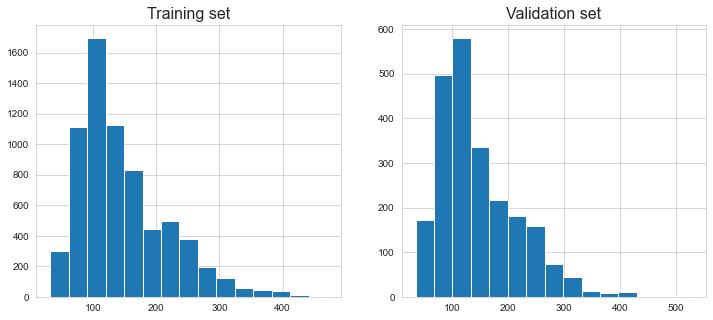

In [19]:
# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### Set up KNN regressor

Text(25, 0.5, '$\\mu=-0.2094$\n$\\mathrm{med}=-2.2324$\n$\\sigma=6.0345$')

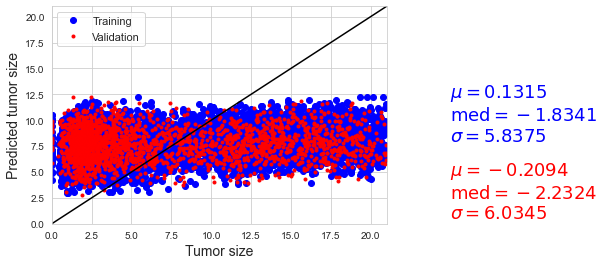

In [46]:
# The KNN regressor, with k = 20 and p = 2
reg = KNeighborsRegressor(n_neighbors=20, p=2)

# Fit the model with un-normalized training set
reg.fit(input_tr, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred = reg.predict(input_tr)  
target_va_pred = reg.predict(input_va)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(0, 25, .1),  np.arange(0, 25, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([0,21])
plt.ylim([0,21])

# Calculate the statistical information for the predicted sets
mu_tr = np.mean(target_tr - target_tr_pred)
median_tr = np.median(target_tr - target_tr_pred)
sigma_tr = np.std(target_tr - target_tr_pred)

mu_va = np.mean(target_va - target_va_pred)
median_va = np.median(target_va - target_va_pred)
sigma_va = np.std(target_va - target_va_pred)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr, median_tr, sigma_tr)
text_va = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va, median_va, sigma_va)
plt.text(25, 8, text_tr, color='b', fontsize=18)
plt.text(25, 0.5, text_va, color='r', fontsize=18)

### Compare the actual and the predicted value

mean =  -0.1314665913398454
median =  1.8340500000000004
SD =  5.837475077257958


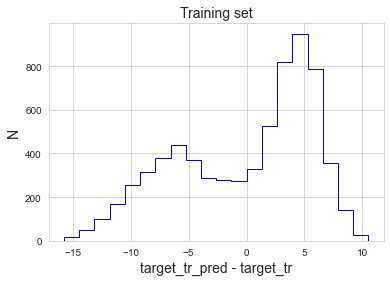

In [54]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred - target_tr', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred - target_tr))
print ('median = ', np.median(target_tr_pred - target_tr))
print ('SD = ', np.std(target_tr_pred - target_tr))

mean =  0.20936679055531265
median =  2.2324
SD =  6.034506395531542


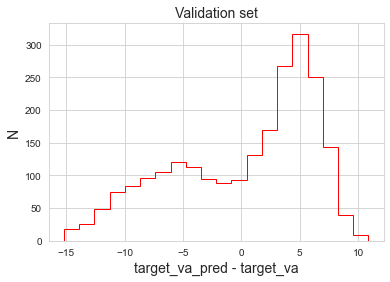

In [53]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step')
plt.xlabel('target_va_pred - target_va', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred - target_va))
print ('median = ', np.median(target_va_pred - target_va))
print ('SD = ', np.std(target_va_pred - target_va))

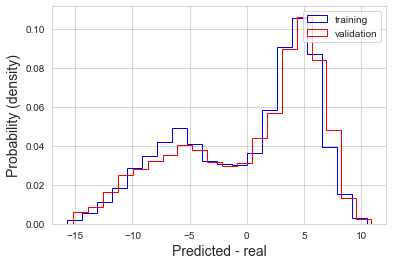

In [55]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

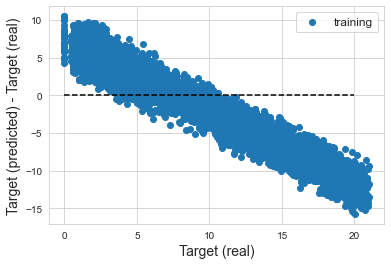

In [56]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr, target_tr_pred - target_tr, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

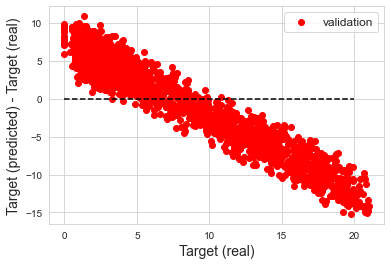

In [58]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va, target_va_pred - target_va, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

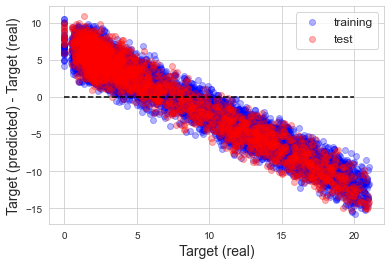

In [59]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,20], [0,0], '--k')
plt.legend(fontsize=12)

## Now do the same thing, but normalize the data first

In [62]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data


# Apply a standard normalization to the target data
stnd_scaler_tar = StandardScaler().fit(target_tr)
target_tr_norm = stnd_scaler_tar.transform(target_tr)
target_va_norm = stnd_scaler_tar.transform(target_va)


### Look at the histograms of the data after normalization

Text(0.5, 1.0, 'Target: validation set')

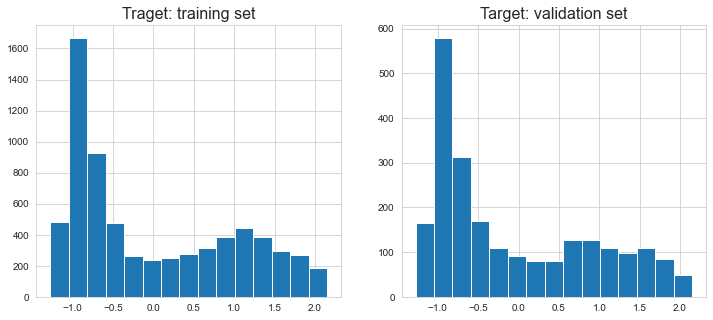

In [63]:
# Show the normalized target distribution for both the training and validation sets

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(target_tr_norm, bins=15)
ax[0].set_title('Target: training set', fontsize=16)

ax[1].hist(target_va_norm, bins=15)
ax[1].set_title('Target: validation set', fontsize=16)

Text(0.5, 1.0, 'Validation set')

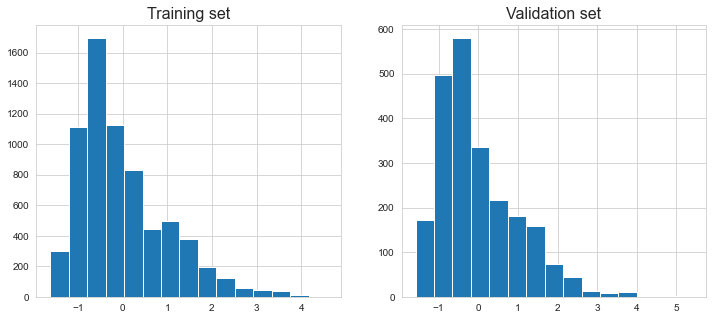

In [64]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### Set up the KNN regressor again for the normalized data

Text(2.6, -1.4, '$\\mu=0.0739$\n$\\mathrm{med}=-0.0016$\n$\\sigma=0.7022$')

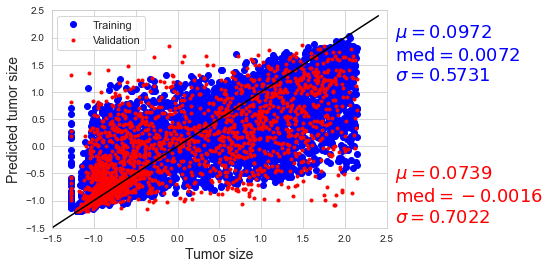

In [84]:
# The KNN regressor, with k = 20 and p = 2
reg = KNeighborsRegressor(n_neighbors=5, p=2)

# Fit the model with the normalized training set
reg.fit(input_tr_norm, target_tr_norm) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred_norm = reg.predict(input_tr_norm)  
target_va_pred_norm = reg.predict(input_va_norm)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr_norm, target_tr_pred_norm, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va_norm, target_va_pred_norm, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(-1.6, 2.5, .1),  np.arange(-1.6, 2.5, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([-1.5, 2.5])
plt.ylim([-1.5, 2.5])

# Calculate the statistical information for the predicted sets
mu_tr_norm = np.mean(target_tr_norm - target_tr_pred_norm)
median_tr_norm = np.median(target_tr_norm - target_tr_pred_norm)
sigma_tr_norm = np.std(target_tr_norm - target_tr_pred_norm)

mu_va_norm = np.mean(target_va_norm - target_va_pred_norm)
median_va_norm = np.median(target_va_norm - target_va_pred_norm)
sigma_va_norm = np.std(target_va_norm - target_va_pred_norm)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr_norm, median_tr_norm, sigma_tr_norm)
text_va_norm = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va_norm, median_va_norm, sigma_va_norm)
plt.text(2.6, 1.2, text_tr_norm, color='b', fontsize=18)
plt.text(2.6, -1.4, text_va_norm, color='r', fontsize=18)

### Compare the actual and the predicted value

mean =  -0.09716065912923044
median =  -0.007177230057217487
SD =  0.5731151177435934


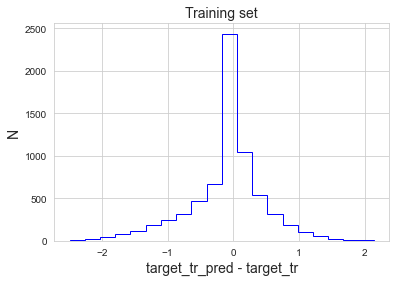

In [71]:
# Inspect the distribution of the difference between the predicted and actual values for the training set 
plt.hist(target_tr_pred_norm - target_tr_norm, 20, color='b', histtype='step')
plt.xlabel('target_tr_pred_norm - target_tr_norm', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Training set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_tr_pred_norm - target_tr_norm))
print ('median = ', np.median(target_tr_pred_norm - target_tr_norm))
print ('SD = ', np.std(target_tr_pred_norm - target_tr_norm))

mean =  -0.07393089024248235
median =  0.0015985648763804372
SD =  0.7021566085724262


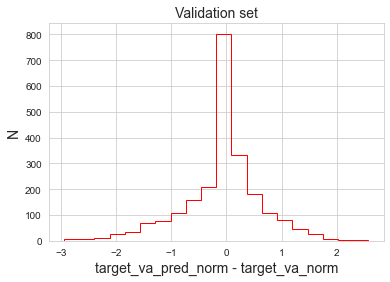

In [72]:
# Inspect the distribution of the difference between the predicted and actual values for the validation set 
plt.hist(target_va_pred_norm - target_va_norm, 20, color='r', histtype='step')
plt.xlabel('target_va_pred_norm - target_va_norm', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.title('Validation set', fontsize=14)

# Print the statistics of the difference
print ('mean = ', np.mean(target_va_pred_norm - target_va_norm))
print ('median = ', np.median(target_va_pred_norm - target_va_norm))
print ('SD = ', np.std(target_va_pred_norm - target_va_norm))

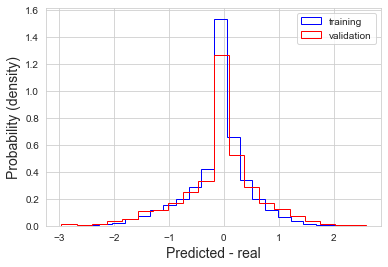

In [73]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred_norm - target_tr_norm, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred_norm - target_va_norm, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

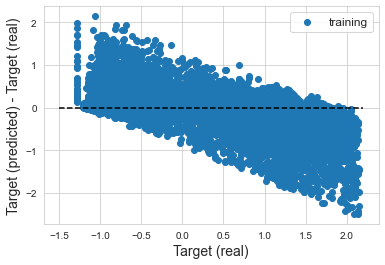

In [78]:
# Inspecting systematic errors for the training set
plt.scatter(target_tr_norm, target_tr_pred_norm - target_tr_norm, label='training')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1.5, 2.2], [0, 0], '--k')
plt.legend(fontsize=12)

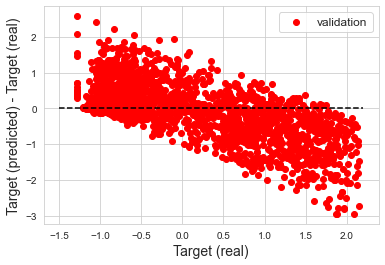

In [79]:
# Inspecting systematic errors for the validation set
plt.scatter(target_va_norm, target_va_pred_norm - target_va_norm, label='validation', color='r')
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1.5, 2.2], [0, 0], '--k')
plt.legend(fontsize=12)

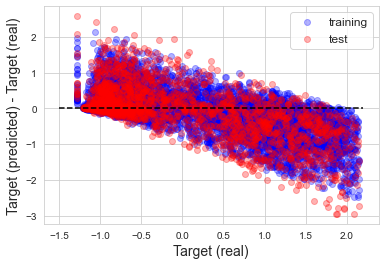

In [80]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr_norm, target_tr_pred_norm - target_tr_norm, label='training', color='b', alpha=.3)
plt.scatter(target_va_norm, target_va_pred_norm - target_va_norm, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([-1.5, 2.2], [0, 0], '--k')
plt.legend(fontsize=12)